# Touring Times of Graphs

In [1]:
# Here are the necessary imports

# tour_graph is a module I wrote in Cython to run a fast tour simulation
from tour_graph import tour_graph as tg
# networkx for easy creation and manipulation of graphs and networks
import networkx as nx
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Creating Graphs

[NetworkX](https://networkx.github.io/) makes it very to create and manipualte graphs and networks of any size and shape.

We will begin by creating a comlete graph with 5 nodes.

In [2]:
# create the graph
g_1 = nx.Graph()

In [3]:
# add the edges, which also creates the nodes if they don't already exist
g_1.add_edges_from(it.combinations(range(5),2))

## Visualizing Graphs

NetowrkX provides many built in visualization tools which run off of matplotlib.

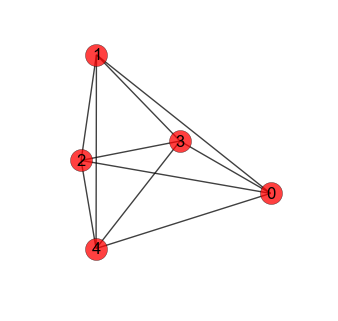

In [4]:
fig_1, ax_1 = plt.subplots(figsize=(3.5,3.5))
nx.draw(g_1, ax=ax_1, node_size=250, with_labels=True, alpha=0.75)

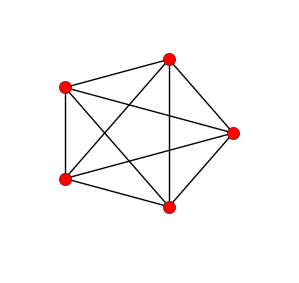

In [5]:
fig_2, ax_2 = plt.subplots(figsize=(3,3))
nx.draw_circular(g_1, ax=ax_2, node_size=80)

## Going For a Tour!

We will take a tour of this graph. This tour will begin at node 0 then walk to an adjacent (connected) node. After each stop on the tour the next node to be visited will be chosen randomly from the adjacent nodes. Adjacent nodes all have an equal probability of being selected because this is an unweighted graph. We will stop the tour when all nodes have been visited.

My tour_graph function uses a numpy adjacency matrix to run the tour. We can generate this matrix directly with networkX!

In [6]:
nx.to_numpy_matrix(g_1).shape

(5, 5)

In [7]:
time, _ = tg.tour_graph(nx.to_numpy_matrix(g_1))
print('Tour time: ',time)

Tour time:  8


### A Distribution of Touring Times

We can repeate this tour many times to get a distribution of touring times. This is implemented in the function `run_simulation` in my `tour_graph` module. The `tour_graph` module is implemented in Cython and is exceptionally fast!

In [8]:
%%time
times = tg.run_simulation(nx.to_numpy_matrix(g_1), n=1000)

CPU times: user 211 ms, sys: 41.2 ms, total: 252 ms
Wall time: 226 ms


**We can see the distribution with a histogram.**

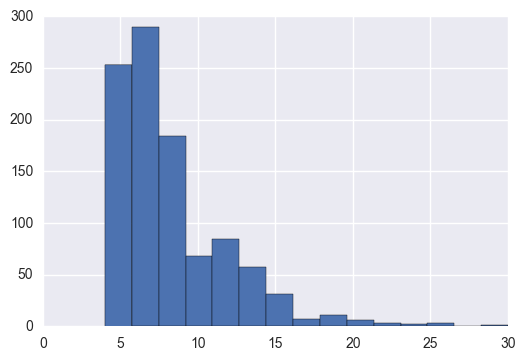

In [21]:
plt.hist(times, bins=15);

We can also visualize this with a kernel density plot.

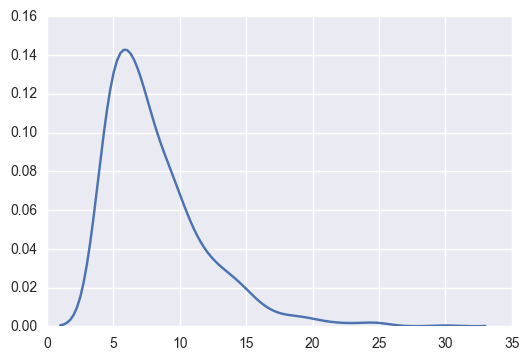

In [23]:
sns.kdeplot(times, bw=1);

Let's overlay those two plots.

AttributeError: Unknown property s

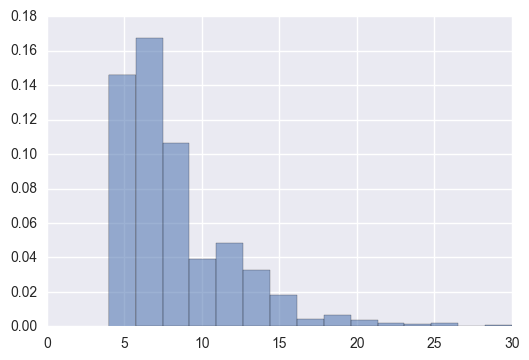

In [27]:
fig, ax_3 = plt.subplots(figsize=(6,4))
ax_3.hist(times, bins=15, alpha=0.55, normed=True);
sns.kdeplot(times, bw=1, ax=ax_3, lw=);